
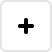
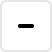
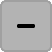
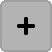
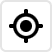
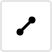
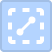
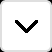
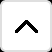
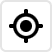
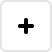
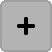
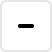
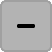
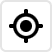
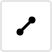
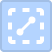
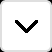
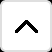
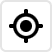

In [1]:
from lets_plot import *
from lets_plot.bistro import *
import pandas as pd
LetsPlot.setup_html()

In [2]:
df = {
    'x': [1],
    'y': [1],
    's': [1]
}

### Without scale

In [3]:
ggplot(df, aes('x','y')) + geom_point() + ggtb()

### `size_zoomin` parameter

The `size_zoomin` parameter accepts an integer value:

* `0` — zoom in disabled (default)
* `-1` — unlimited zoom in
* Any other positive number — maximum zoom-in limit. For example, `2` means the geometry can be scaled up to **2×**.

#### `size_zoomin=0` zoom in disabled

In [4]:
ggplot(df, aes('x','y')) + geom_point() + ggtb(size_zoomin=0)

#### `size_zoomin=-1` unlimited zoom in

In [5]:
ggplot(df, aes('x','y')) + geom_point() + ggtb(size_zoomin=-1)

#### `size_zoomin=3` zoom is capped at three times. 

In [6]:
ggplot(df, aes('x','y')) + geom_point() + ggtb(size_zoomin=3)

### `scale` parameter

The `scale` parameter accepts a string value: `x`, `y`, `min`, or `max` (default: `max`).
It defines which axis is used to calculate the scaling factor.

* `x` and `y` specify the corresponding axis.
* `min` uses the smaller scaling factor.
* `max` uses the larger scaling factor.

#### `scale="x"` 
Try using rubber-band zoom along the x axis only (and then along the y axis) to see the effect.

In [7]:
ggplot(df, aes('x','y')) + geom_point(size=10) + ggtb(scale="x", size_zoomin=-1)

#### `scale="y"` 

In [8]:
ggplot(df, aes('x','y')) + geom_point(size=10) + ggtb(scale="y", size_zoomin=-1)

#### `scale="min"` 

In [9]:
ggplot(df, aes('x','y')) + geom_point(size=10) + ggtb(scale="min", size_zoomin=-1)

#### `scale="max"` default

In [10]:
ggplot(df, aes('x','y')) + geom_point(size=10) + ggtb(scale="max", size_zoomin=-1)

### Support for various size types

#### Default size

In [11]:
ggplot(df, aes('x','y')) + geom_point() + ggtb(size_zoomin=-1)

#### Constant size

In [12]:
ggplot(df, aes('x','y')) + geom_point(size=80) + ggtb(size_zoomin=-1)

#### Size from Aes

In [13]:
ggplot(df, aes('x','y')) + geom_point(aes(size='s')) + ggtb(size_zoomin=-1)

#### Constant size with `size_unit`

Scaling from `ggtb()` is not applied to layers that use `size_unit`. However, it is still applied to the other layers.

In [14]:
ggplot(df, aes('x','y')) + \
    geom_point(size=0.1, size_unit = 'x') + \
    geom_point(size=2, color='red') + \
    ggtb(size_zoomin=-1)

### Support `gggrid()`

`ggtb()` can only be added to the root `gggrid()`. All plots inside will use the same scaling settings. Adding `ggtb()` to plots inside `gggrid()` is not allowed.

In [15]:
gggrid(
    [
        ggplot(df, aes('x','y')) + geom_point(size=10),
        gggrid([
            ggplot(df, aes('x','y')) + geom_point(size=10),
            ggplot(df, aes('x','y')) + geom_point(size=20)
        ])
    ]
) + ggtb(size_zoomin=0, scale="x")

In [16]:
gggrid(
    [
        ggplot(df, aes('x','y')) + geom_point(size=10),
        ggplot(df, aes('x','y')) + geom_point(size=20)
    ]
) + ggtb()

### Support `facet_wrap()`

In [17]:
mpg = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg2.csv')

In [18]:
p = (
  ggplot(mpg, 
         aes('engine horsepower', 'miles per gallon', 
             color=as_discrete('origin of car',order=-1)))
  + geom_point()
  + theme_grey() + ggtitle('Efficiency vs Engine Horsepower')
)
p

In [19]:
p + facet_wrap(['origin of car', 'number of cylinders'], order=[-1, 1], ncol=3) + ggtb(size_zoomin=-1)